In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.model_selection import train_test_split

In [100]:
data_set = pd.read_csv('titanic.csv')
data_set.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'Siblings/Spouses Aboard',
       'Parents/Children Aboard', 'Fare'],
      dtype='object')

In [101]:
data_set.head(5)

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [104]:
sexl = pd.get_dummies(data_set['Sex'],drop_first=True)
# pclass = pd.get_dummies(data_set['Pclass'],drop_first=True)

In [105]:
print(sex.shape)

data_set = pd.concat([data_set,sexl],axis = 1)
data_set.head(5)

(887, 1)


,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,male
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500,1
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833,0
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250,0
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000,0
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500,1


In [108]:
data_set.drop(['Sex','Name'],axis = 1, inplace=True)
data_set.head(5)


KeyError: "['Sex' 'Name'] not found in axis"

In [152]:
datacopy = data_set.copy()
datacopy.head(4)


,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,male
0,0,3,22.0,1,0,7.2500,1
1,1,1,38.0,1,0,71.2833,0
2,1,3,26.0,0,0,7.9250,0
3,1,1,35.0,1,0,53.1000,0


In [186]:
pclass3 = datacopy.loc[datacopy['Pclass'] == 3]
pclass1 = datacopy.loc[datacopy['Pclass']== 1]
pclass2 = datacopy.loc[datacopy['Pclass'] == 2]

# pclass1.head(6)

pclass3.loc[:,'Pclass']= 1
pclass1.loc[:,'Pclass']= 3


df = pd.concat([pclass1,pclass2,pclass3],axis =0 )
df.head(6)

farelow = df.loc[df['Fare'] <= 512.32920/3 ]
farelow.add(axis=1,fill_value=0)
# farelow = farelow['Fare']
farelow.head(4)
# pclass1 = datacopy.loc[datacopy['Pclass']== 1]
# pclass2 = datacopy.loc[datacopy['Pclass'] == 2]
# print(df.describe())

data_set = df
farelow.head(4)
# data_set.head(30)
# print('.......................')
# pclass1.head(3)

C:\Users\karsi\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


TypeError: f() missing 1 required positional argument: 'other'

In [155]:
allTrue = data_set.loc[data_set['Survived'] == True]
print(allTrue)

     Survived  Pclass    Age  Siblings/Spouses Aboard  \
1           1       3  38.00                        1   
3           1       3  35.00                        1   
11          1       3  58.00                        0   
23          1       3  28.00                        0   
31          1       3  48.00                        1   
51          1       3  49.00                        1   
54          1       3  46.00                        0   
60          1       3  38.00                        0   
87          1       3  23.00                        3   
96          1       3  23.00                        0   
135         1       3  19.00                        0   
150         1       3  22.00                        1   
165         1       3  48.00                        0   
186         1       3  45.00                        0   
193         1       3  44.00                        0   
194         1       3  58.00                        0   
208         1       3  40.00   

C:\Users\karsi\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


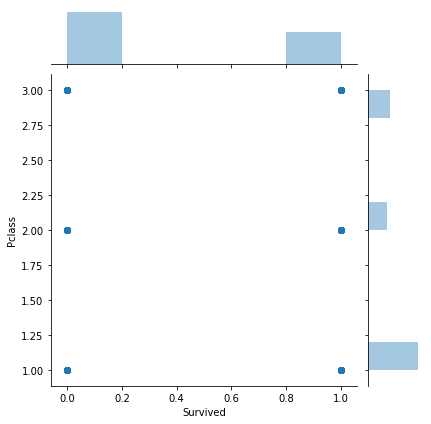

In [169]:
sns.jointplot(x=data_set.Survived ,y=  data_set.Pclass)

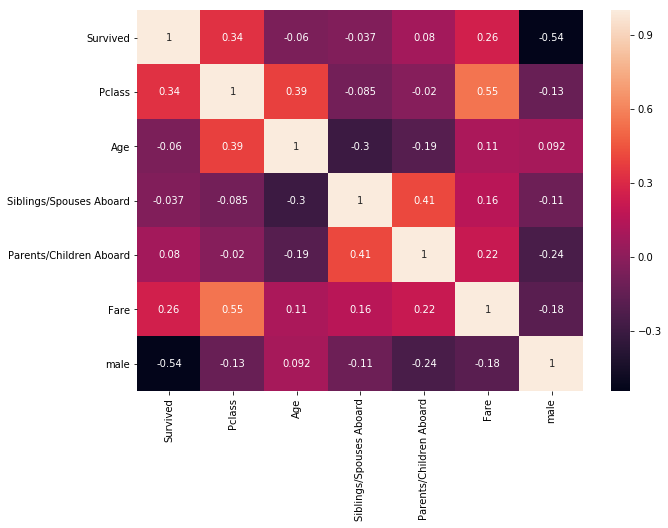

In [170]:
import seaborn as sns
import matplotlib.pyplot as plt 
plt.figure(figsize = (10,7))

sns.heatmap(data_set.corr(),annot=True)

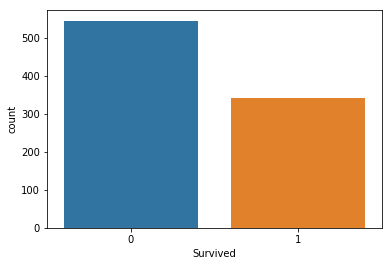

In [45]:
sns.countplot(data_set['Survived'])

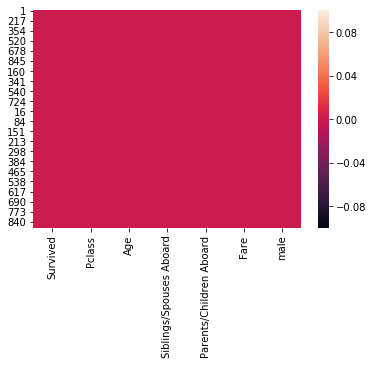

In [157]:
sns.heatmap(data_set.isnull())

In [158]:
X = data_set.drop(['Survived'],axis = 1)
y = data_set['Survived']
print(data_set.head(1))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

   Survived  Pclass   Age  Siblings/Spouses Aboard  Parents/Children Aboard  \
1         1       3  38.0                        1                        0   

      Fare  male  
1  71.2833     0  


In [159]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()

In [160]:
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [161]:
predictions = logmodel.predict(X_test)

In [162]:
from sklearn.metrics import classification_report

In [163]:
classification_report(y_test,predictions)

'             precision    recall  f1-score   support\n\n          0       0.80      0.87      0.83       151\n          1       0.81      0.72      0.76       116\n\navg / total       0.80      0.80      0.80       267\n'

In [39]:
from sklearn.metrics import confusion_matrix

In [164]:
confusion_matrix(y_test,predictions)

array([[131,  20],
       [ 33,  83]], dtype=int64)

In [41]:
from sklearn.metrics import accuracy_score

In [166]:
accuracy_score(y_test,predictions)

0.8014981273408239

In [188]:
from sklearn.naive_bayes import GaussianNB
modelNaive = GaussianNB()

modelNaive.fit(X_train,y_train)



GaussianNB(priors=None)

In [189]:
prediNaive = modelNaive.predict(X_test)
classification_report(y_test,prediNaive)


'             precision    recall  f1-score   support\n\n          0       0.79      0.86      0.82       151\n          1       0.79      0.70      0.74       116\n\navg / total       0.79      0.79      0.79       267\n'

In [190]:
confusion_matrix(y_test,prediNaive)

array([[130,  21],
       [ 35,  81]], dtype=int64)

In [191]:
accuracy_score(y_test,prediNaive)

0.7902621722846442

In [211]:
from sklearn.ensemble import RandomForestClassifier
modelRF = RandomForestClassifier(n_estimators=200, random_state=0,max_depth= 10)  
modelRF.fit(X_train, y_train)  
rf_pred = modelRF.predict(X_test)
classification_report(y_test,rf_pred)




'             precision    recall  f1-score   support\n\n          0       0.81      0.93      0.87       151\n          1       0.89      0.72      0.79       116\n\navg / total       0.85      0.84      0.84       267\n'

In [212]:
confusion_matrix(y_test,rf_pred)

array([[141,  10],
       [ 33,  83]], dtype=int64)

In [213]:
accuracy_score(y_test,rf_pred)

0.8389513108614233